# Analyse en Composantes Principales

In [24]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
#n_comp = 2

# import de l'échantillon
data = pd.read_csv("timesData.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [25]:
df_clean=data
# countries:
df_clean["country"]= df_clean["country"].replace({'Unisted States of America':'United States of America',
                                                 'Unted Kingdom':'United Kingdom'})
print(df_clean["country"].unique())

['United States of America' 'United Kingdom' 'Switzerland' 'Canada'
 'Hong Kong' 'Japan' 'South Korea' 'Singapore' 'Australia' 'China'
 'France' 'Sweden' 'Germany' 'Republic of Ireland' 'Finland' 'Taiwan'
 'South Africa' 'Turkey' 'Netherlands' 'Belgium' 'Denmark' 'Norway'
 'Spain' 'New Zealand' 'Egypt' 'Austria' 'Israel' 'Brazil' 'Italy'
 'Russian Federation' 'Greece' 'Iceland' 'Czech Republic' 'India' 'Poland'
 'Iran' 'Portugal' 'Thailand' 'Chile' 'Estonia' 'Saudi Arabia' 'Mexico'
 'Colombia' 'Macau' 'Morocco' 'Luxembourg' 'Cyprus' 'Uganda' 'Malaysia'
 'Lebanon' 'Romania' 'Slovenia' 'Pakistan' 'Hungary'
 'United Arab Emirates' 'Belarus' 'Serbia' 'Slovakia' 'Bangladesh' 'Ghana'
 'Nigeria' 'Indonesia' 'Jordan' 'Latvia' 'Kenya' 'Argentina' 'Qatar'
 'Oman' 'Ukraine' 'Lithuania']


In [3]:
#data.num_students = pd.to_numeric(timesData.income, errors='coerce')

In [26]:
print(data["income"])

0       34.5
1       83.7
2       87.5
3       64.3
4          -
        ... 
2598    35.4
2599    44.0
2600    37.9
2601    40.4
2602    39.8
Name: income, Length: 2603, dtype: object


In [27]:
# clean toutes les cellules non pertinentes
#df_clean["income"] = data["income"].replace({'-': None})
data.dropna(inplace=True)
print(data)

     world_rank                        university_name  \
1             2     California Institute of Technology   
2             3  Massachusetts Institute of Technology   
3             4                    Stanford University   
4             5                   Princeton University   
5             6                University of Cambridge   
...         ...                                    ...   
2597    601-800                      Xidian University   
2598    601-800                    Yeungnam University   
2599    601-800            Yıldız Technical University   
2601    601-800           Yokohama National University   
2602    601-800                     Yuan Ze University   

                       country  teaching international  research  citations  \
1     United States of America      97.7          54.6      98.0       99.9   
2     United States of America      97.8          82.3      91.4       99.9   
3     United States of America      98.3          29.5      98.1  

In [28]:
# total_score
#df_clean["total_score"]= data["total_score"].replace({'-':None})
print(data["total_score"].tail(50))

2550    -
2551    -
2552    -
2553    -
2554    -
2556    -
2557    -
2558    -
2559    -
2560    -
2561    -
2562    -
2563    -
2564    -
2565    -
2567    -
2568    -
2569    -
2570    -
2571    -
2572    -
2573    -
2574    -
2575    -
2576    -
2577    -
2578    -
2579    -
2580    -
2581    -
2582    -
2583    -
2584    -
2585    -
2586    -
2587    -
2588    -
2589    -
2590    -
2591    -
2592    -
2593    -
2594    -
2595    -
2596    -
2597    -
2598    -
2599    -
2601    -
2602    -
Name: total_score, dtype: object


In [19]:
# international
#df_clean["international"]= data["international"].replace({'-':None})
#print(df_clean["international"].head(30))
#print(data["international"])
#print("Les champs research et citations sont OK")

1       54.6
2       82.3
3       29.5
4       70.3
5       77.7
        ... 
2597    12.8
2598    24.3
2599    14.9
2601    23.3
2602    17.7
Name: international, Length: 2362, dtype: object


In [54]:
data2016 = data[data.year==2016].iloc[:50,:]
print(data2016)

     world_rank                                    university_name  \
1803          1                 California Institute of Technology   
1804          2                               University of Oxford   
1805          3                                Stanford University   
1806          4                            University of Cambridge   
1807          5              Massachusetts Institute of Technology   
1809          7                               Princeton University   
1810          8                            Imperial College London   
1811          9  ETH Zurich – Swiss Federal Institute of Techno...   
1812         10                              University of Chicago   
1813         11                           Johns Hopkins University   
1814         12                                    Yale University   
1815         13                 University of California, Berkeley   
1816         14                          University College London   
1818         16     

In [9]:
#print(data2016["country"].unique())

In [31]:
data2016.describe()

,teaching,research,citations,student_staff_ratio,year
count,50.000000,50.00000,50.000000,50.000000,50.0
mean,69.980000,78.83600,90.806000,13.956000,2016.0
std,11.934327,11.14408,9.133151,7.082492,0.0
min,48.400000,47.70000,58.800000,3.600000,2016.0
25%,60.300000,69.85000,86.600000,9.300000,2016.0
50%,68.700000,77.35000,94.000000,13.400000,2016.0
75%,78.050000,88.57500,98.575000,16.850000,2016.0
max,95.600000,98.90000,99.900000,41.900000,2016.0


In [55]:
#numpy / pandas
import numpy as np
import plotly.graph_objects as go



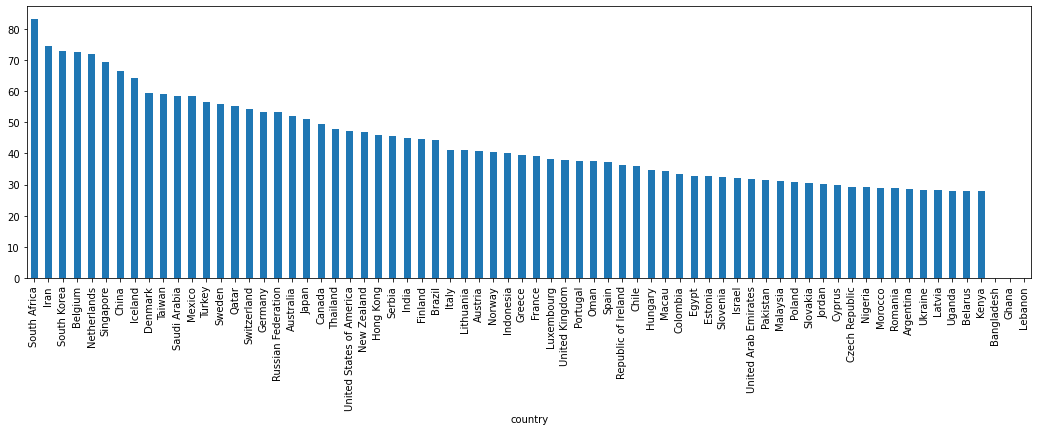

In [56]:
data2016.income = pd.to_numeric(dfValue.income, errors='coerce')
ax = dfValue.groupby(['country']).income.mean().sort_values(ascending=False).plot(kind='bar', figsize = (18,5))

In [57]:
# choix du nombre de composantes à calculer
n_comp = 7

#data = data[data.year==2016]
# selection des colonnes à prendre en compte dans l'ACP
#data_pca = data[["world_rank","university_name","country","teaching","international","research","citations","income","total_score","num_students","student_staff_ratio","international_students","female_male_ratio","year"]]

data2016.income = pd.to_numeric(data.income) # errors='coerce'
#data2016.international = pd.to_numeric(data.international)#, errors='coerce')

for el in data2016.international:
    print(el)
data2016.total_score = pd.to_numeric(data.total_score, errors='coerce')
#data2016.num_students  = [str(each).replace(',', '') for each in data.num_students]
data2016.num_students =  pd.to_numeric(data.num_students, errors='coerce')

#X=data2016.values

#data2016_pca = data2016 [["teaching","international","research","citations","income","total_score", "num_students",
                 #"student_staff_ratio"]]


64.0
94.4
76.3
91.5
84.0
78.5
96.0
97.9
65.0
70.0
64.3
61.9
94.4
56.4
49.5
63.9
56.5
53.7
57.1
89.8
53.9
96.2
93.8
73.1
62.8
49.3
98.6
51.2
87.1
90.5
68.6
45.8
62.8
85.5
42.9
61.5
71.5
58.4
99.5
31.7
39.5
70.3
33.0
93.3
63.8
85.5
94.6
87.0
84.4
66.5


In [14]:
# selection des colonnes à prendre en compte dans l'ACP
#data = data[data.year==2016]

In [15]:
#data.income = pd.to_numeric(data.income, errors='coerce')
#data.num_students  = [str(each).replace(',', '') for each in data.num_students]
#data.num_students =  pd.to_numeric(data.num_students, errors='coerce')

#X=data.values

#data_pca = data[["income","num_students"]]

#print(X)

In [58]:
# préparation des données pour l'ACP
#data2016_pca = data2016_pca.fillna(data2016_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable

#data2016=data.dropna(inplace=True)



data2016_pca = data2016 [["teaching","international","research","citations","income","total_score", "num_students",
                 "student_staff_ratio"]]

X = data2016_pca.values

for el in X : 
    print(el)
#names = data2016["university_name"] # ou data.index pour avoir les intitulés
#features = data2016.columns

[95.6 '64.0' 97.6 99.8 97.8 95.2 nan 6.9]
[86.5 '94.4' 98.9 98.8 73.1 94.2 nan 11.6]
[92.5 '76.3' 96.2 99.9 63.3 93.9 nan 7.8]
[88.2 '91.5' 96.7 97.0 55.0 92.8 nan 11.8]
[89.4 '84.0' 88.6 99.7 95.4 92.0 nan 9.0]
[85.1 '78.5' 91.9 99.3 52.1 90.1 nan 8.4]
[83.3 '96.0' 88.5 96.7 53.7 89.1 nan 11.7]
[77.0 '97.9' 95.0 91.1 80.0 88.3 nan 14.7]
[85.7 '65.0' 88.9 99.2 36.6 87.9 nan 6.9]
[77.6 '70.0' 90.4 98.2 100.0 87.6 nan 3.6]
[86.5 '64.3' 87.8 97.2 43.3 87.4 nan 4.4]
[80.4 '61.9' 91.1 99.7 47.9 87.2 nan 16.4]
[78.1 '94.4' 91.0 94.2 40.5 87.1 nan 10.7]
[80.8 '56.4' 88.6 98.5 47.9 85.8 nan 10.3]
[82.0 '49.5' 86.9 98.6 47.9 85.2 nan 6.5]
[77.9 '63.9' 86.1 97.2 33.7 84.0 nan 10.2]
[76.0 '56.5' 78.0 99.0 100.0 82.7 nan 4.8]
[76.8 '53.7' 85.2 94.4 56.3 82.4 nan 9.0]
[67.4 '57.1' 88.8 99.1 57.5 82.3 nan 13.1]
[68.6 '89.8' 77.2 96.3 36.1 80.3 nan 14.1]
[69.8 '53.9' 78.4 96.5 81.2 79.5 nan 13.8]
[71.7 '96.2' 84.5 79.4 49.8 79.2 nan 15.5]
[64.5 '93.8' 75.8 93.8 40.1 78.2 nan 11.4]
[60.6 '73.1' 81.1 9

In [42]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

ValueError: Found array with 0 sample(s) (shape=(0, 14)) while a minimum of 1 is required by StandardScaler.

In [18]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Eboulis des valeurs propres
display_screen_plot(pca)

In [ ]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))



In [ ]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

Analyse en Composantes Principales

1.Quelles ressemblances peut-il y avoir d'une université à une autre. 
2.Quelles ressemblances existent-il entre différents critères d'évaluation des universités ? 
  2.a.définir quand est-ce que 2 universités se ressemblent 
  2.b.et quand est-ce qu'elles se ressemblent du point de vue de l'ensemble des colonnes (c'est-à-dire des critères d'évaluation du Times Higher Education World University Ranking).

3.Est-il possible de faire un bilan des ressemblances ? ( Vous chercherez ici à faire une typologie, une partition des universités, c'est-à-dire à construire des groupes d'universités homogènes du point de vue de l'ensemble des variables. A l'intérieur d'un groupe, les individus se ressemblent et d'un groupe à l'autre ils sont différents.